## PRAMOD NAGISETTY
## Clg mail id : pn118@student.le.ac.uk
## University name : University of Leicester

# Loading the data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/dataset.csv')

# Print basic info about the dataset
print("Dataset Info:")
print(df.info())

# Optional: Display first few rows
print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  

# Distribution Analysis

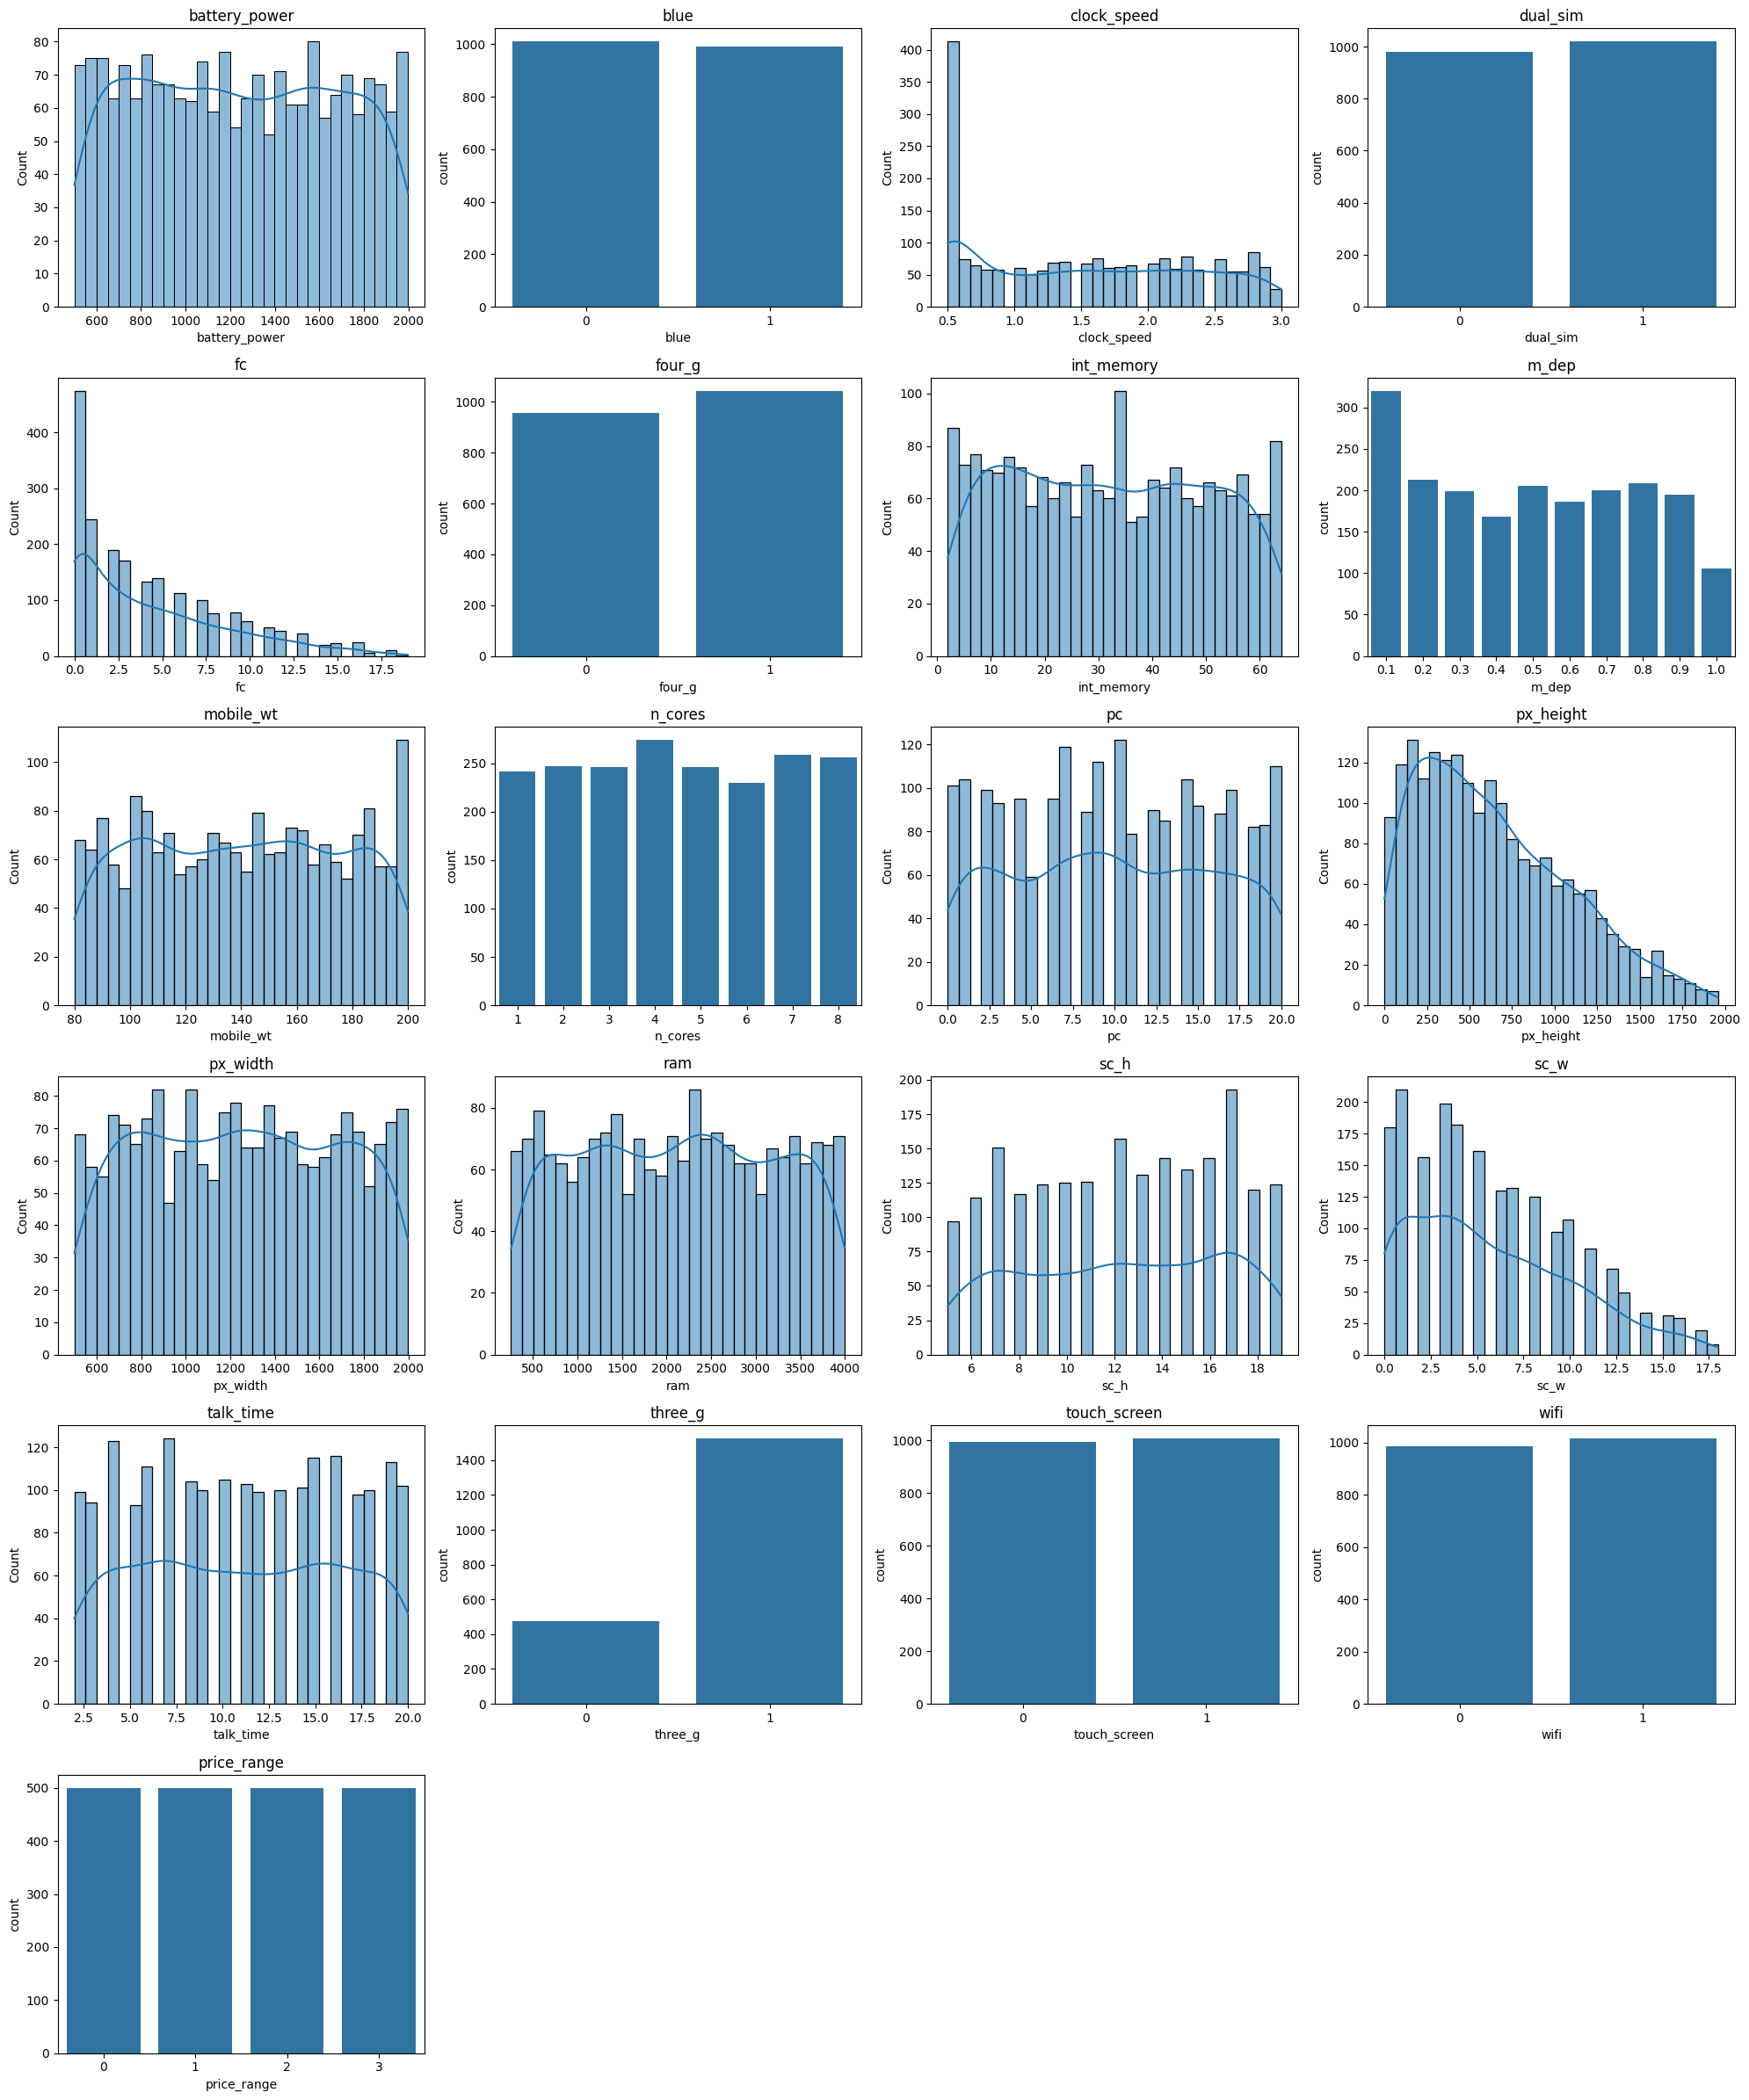

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplot grid
num_columns = len(df.columns)
n_cols = 4
n_rows = (num_columns + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 4))

# Plot each feature
for idx, column in enumerate(df.columns):
    plt.subplot(n_rows, n_cols, idx + 1)
    if df[column].nunique() <= 10:
        sns.countplot(x=df[column])
    else:
        sns.histplot(df[column], kde=True, bins=30)
    plt.title(column)
    plt.tight_layout()

plt.show()


# Heatmap for the correlation Analysis

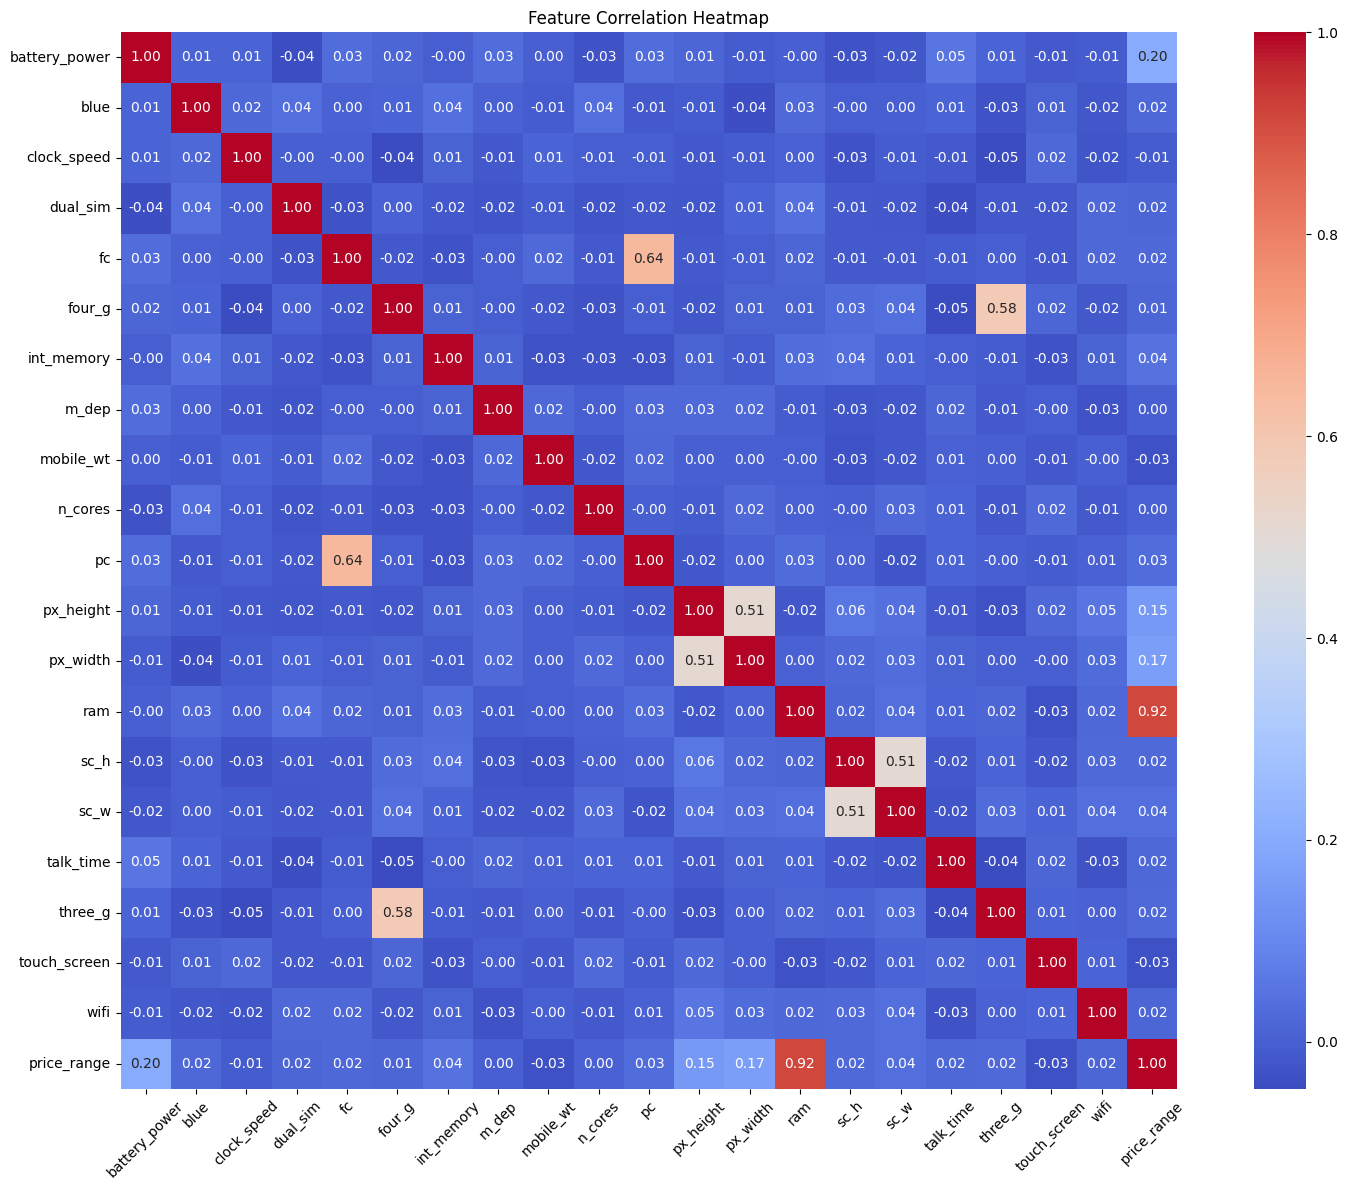

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Analysis of most correlated Feature with price ranges


/tmp/ipython-input-4-4097475966.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='price_range', y=feature, data=df, estimator='mean', ci='sd')


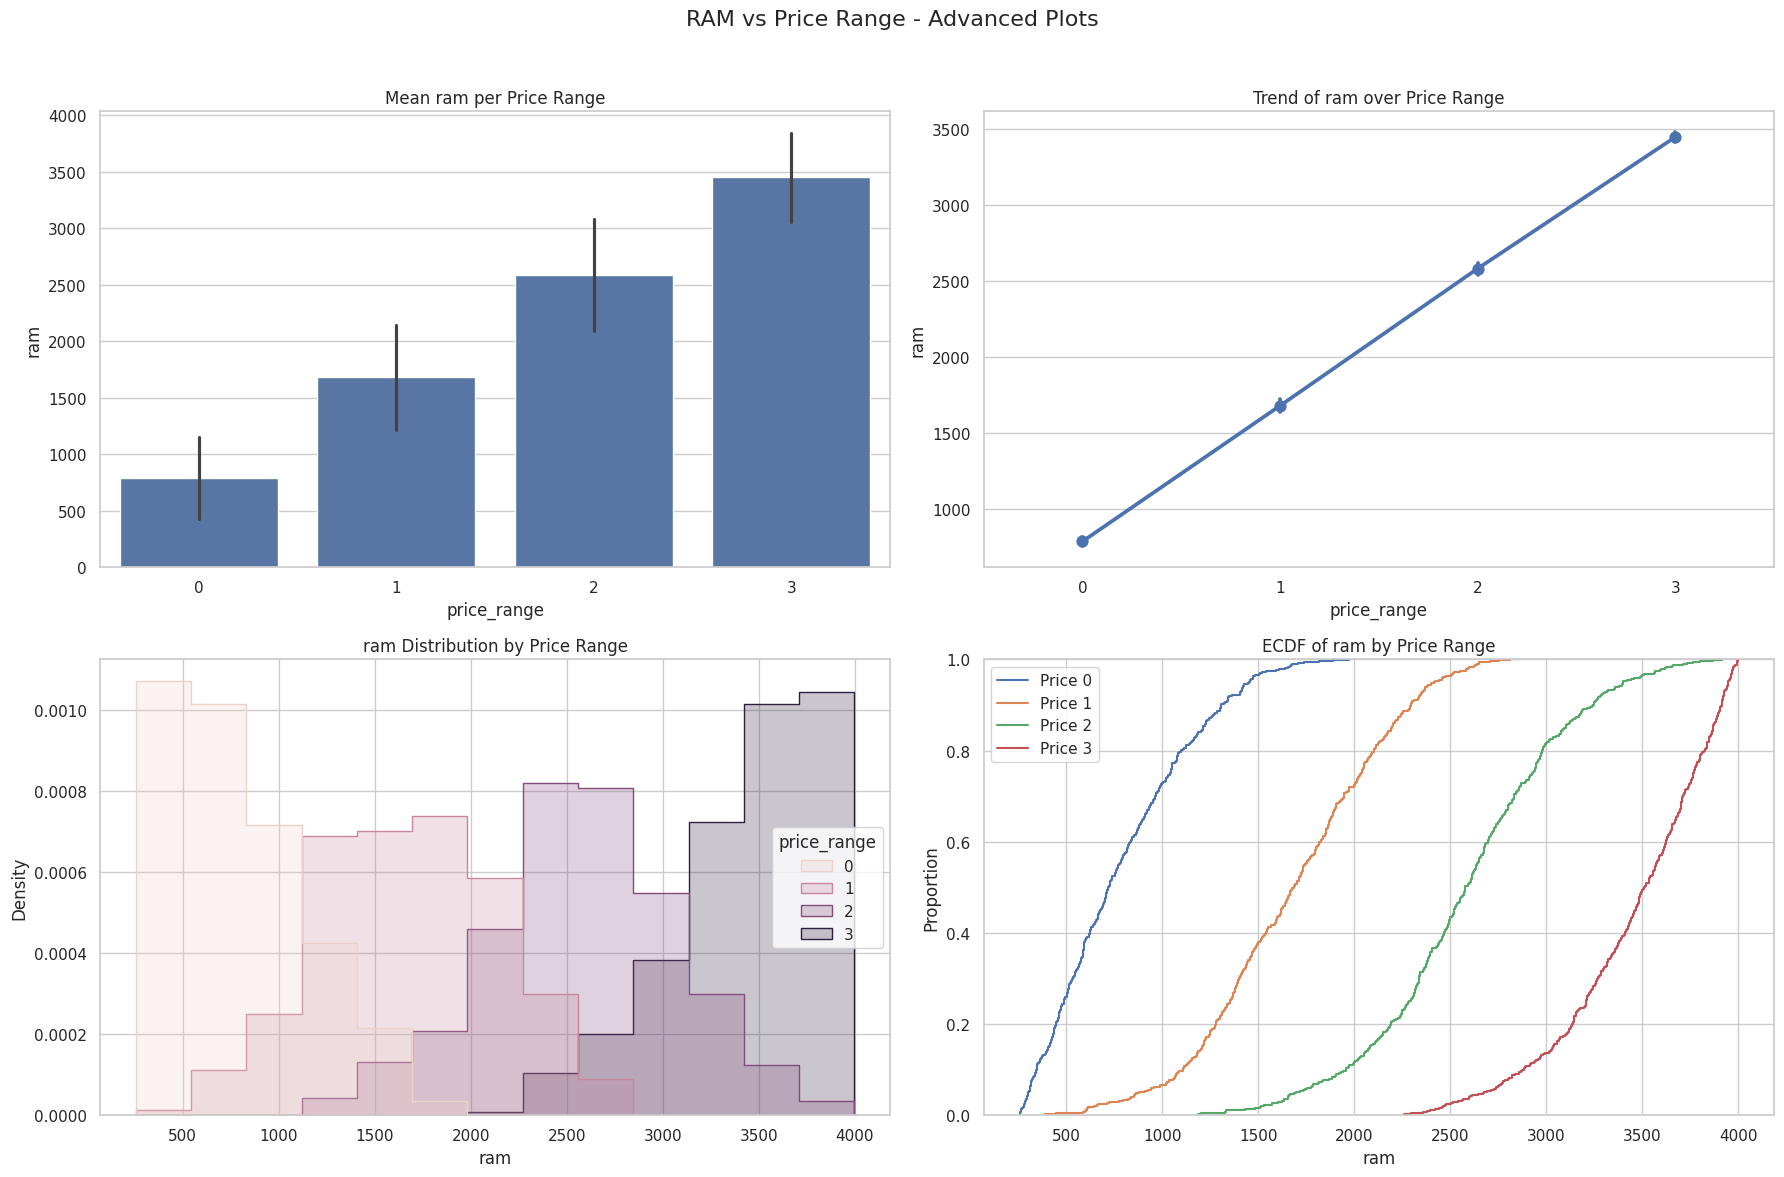

/tmp/ipython-input-4-4097475966.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='price_range', y=feature, data=df, estimator='mean', ci='sd')


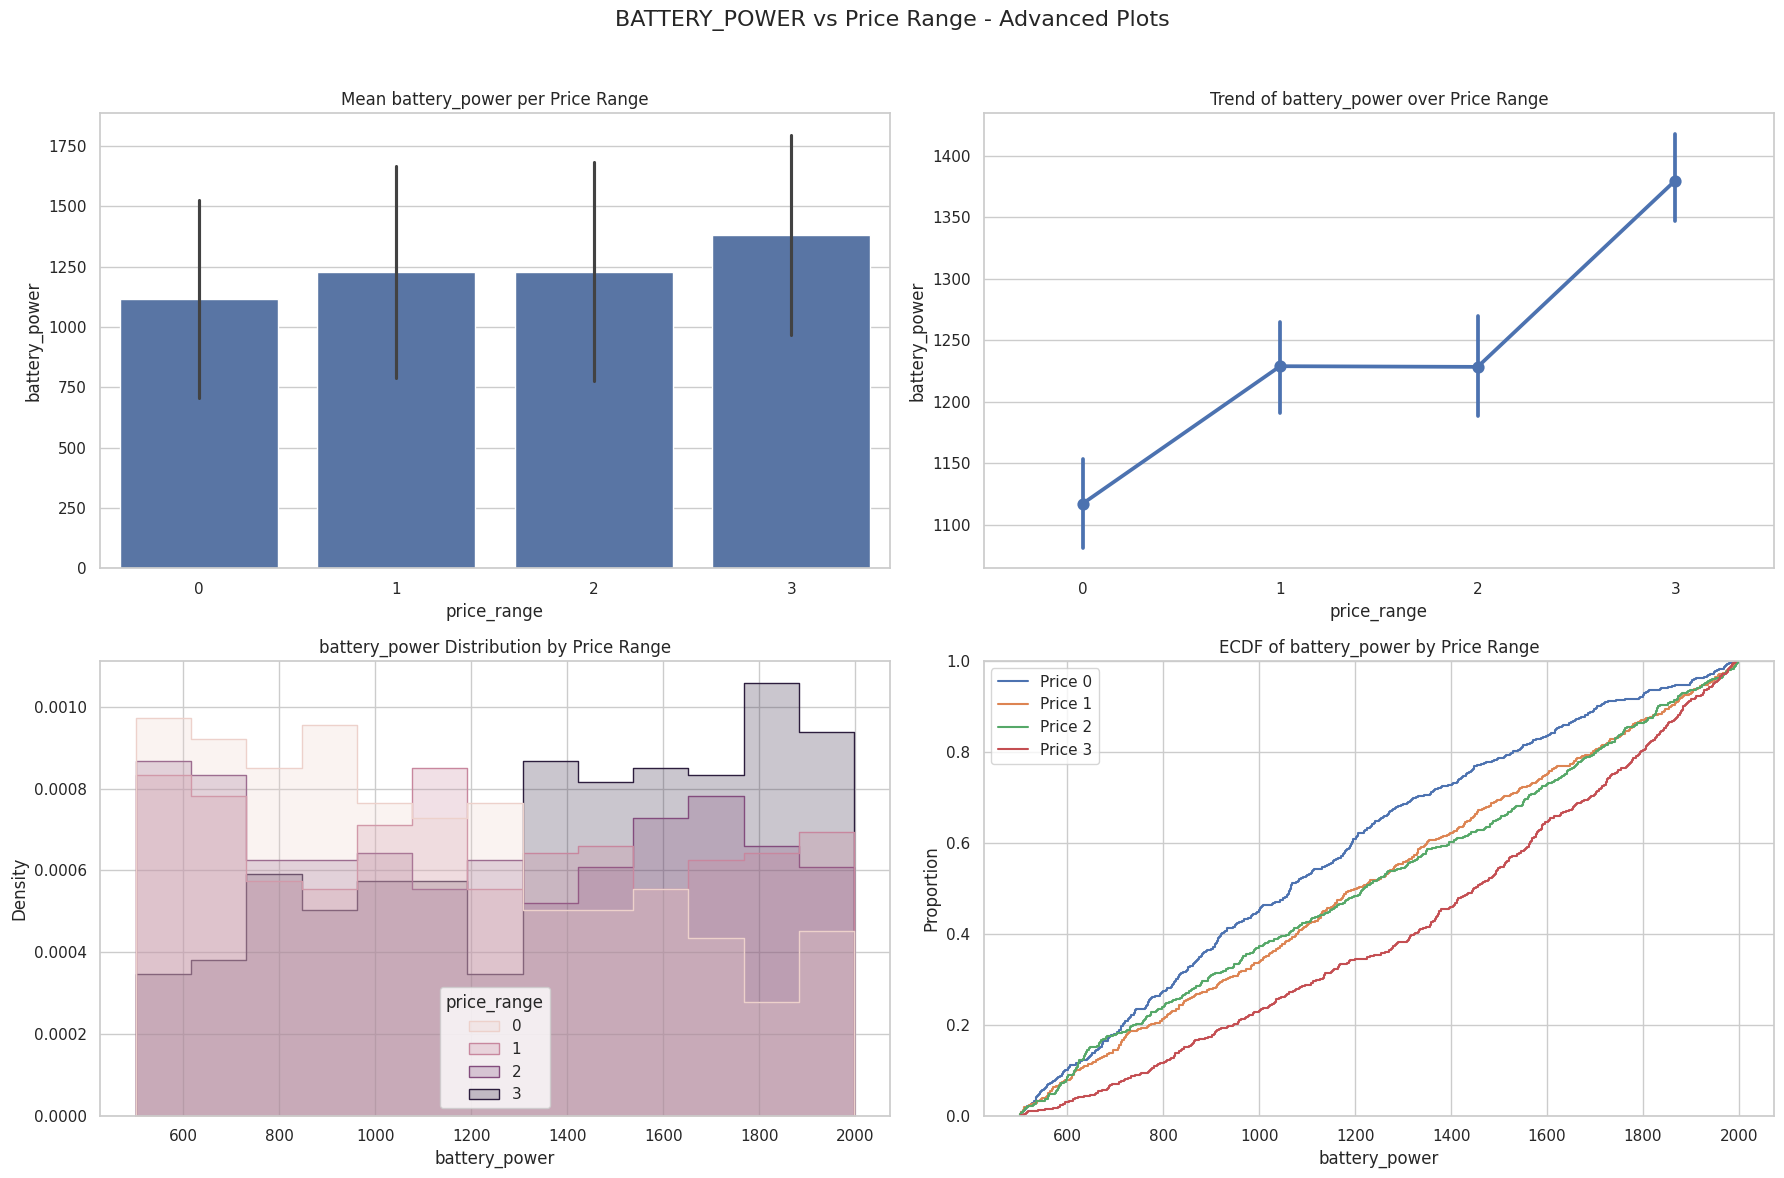

/tmp/ipython-input-4-4097475966.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='price_range', y=feature, data=df, estimator='mean', ci='sd')


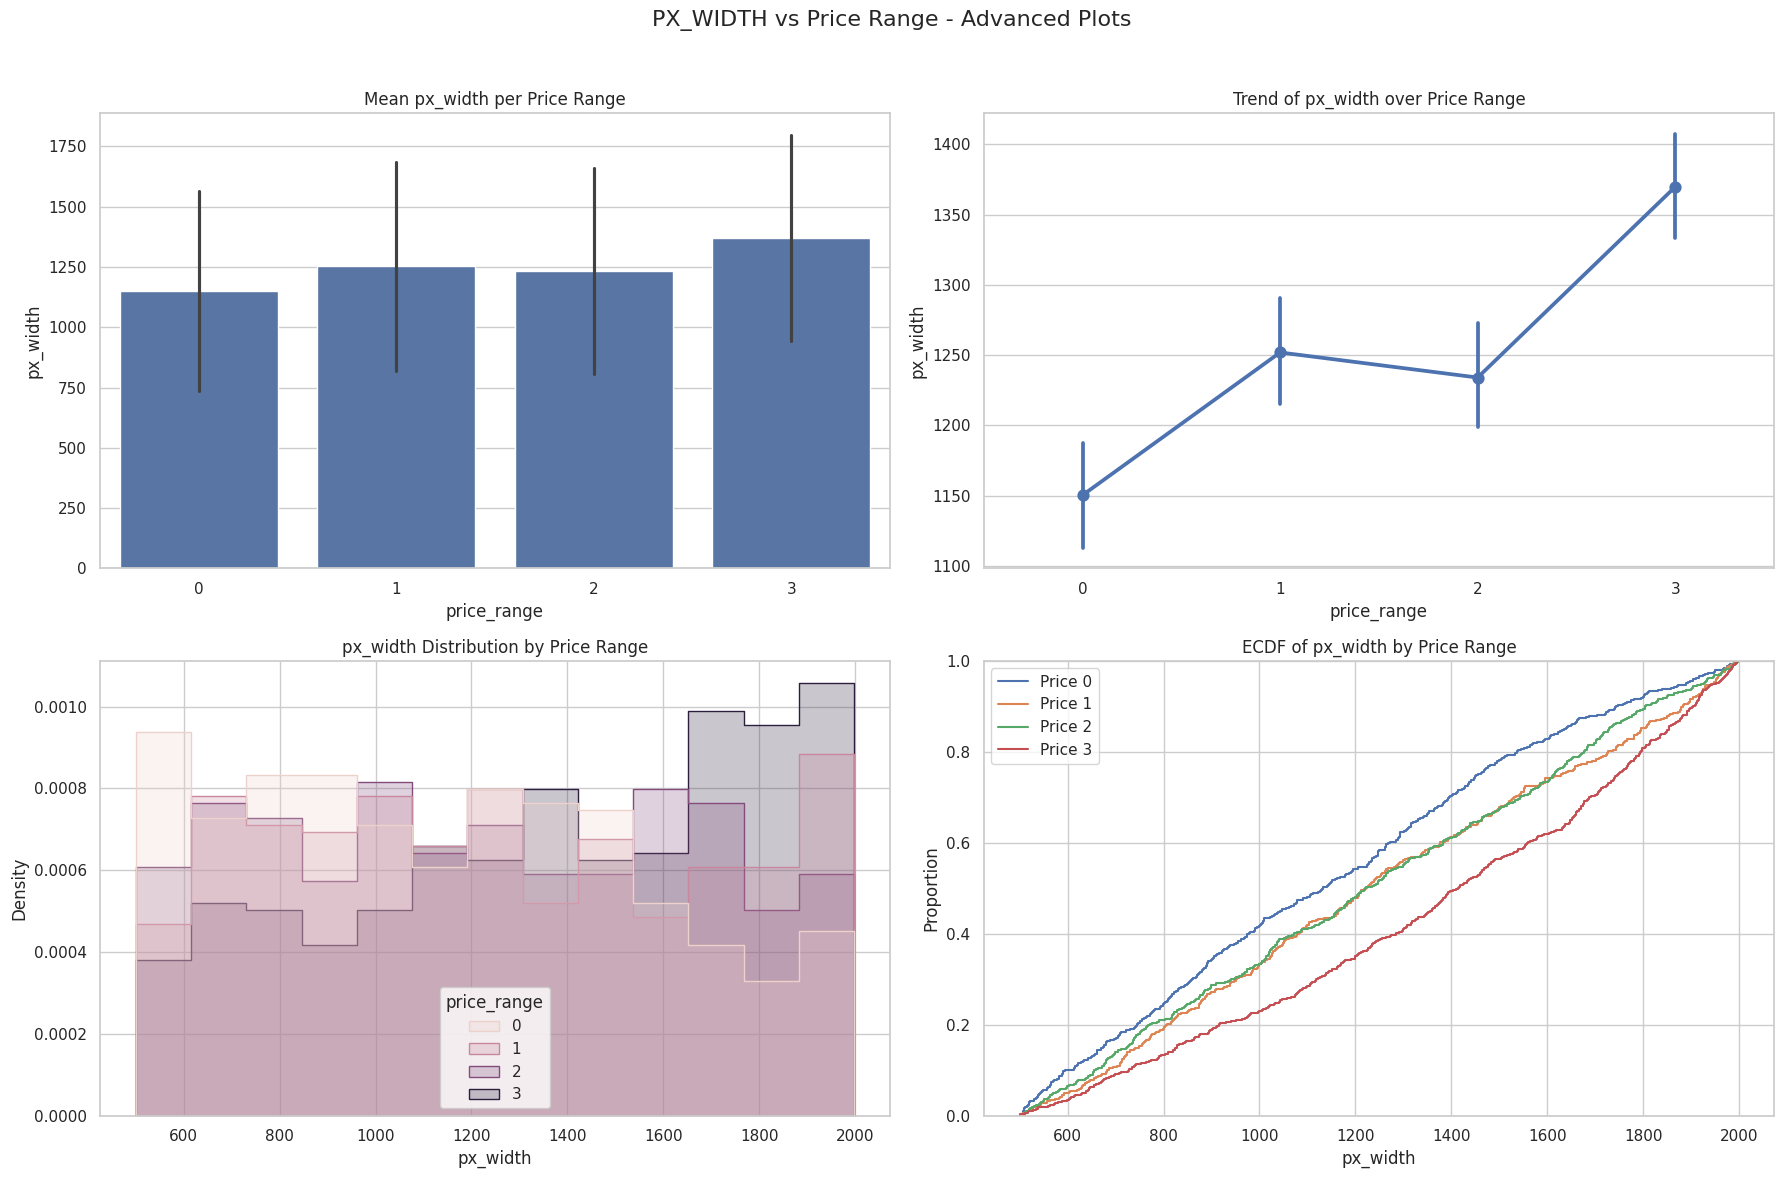

/tmp/ipython-input-4-4097475966.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='price_range', y=feature, data=df, estimator='mean', ci='sd')


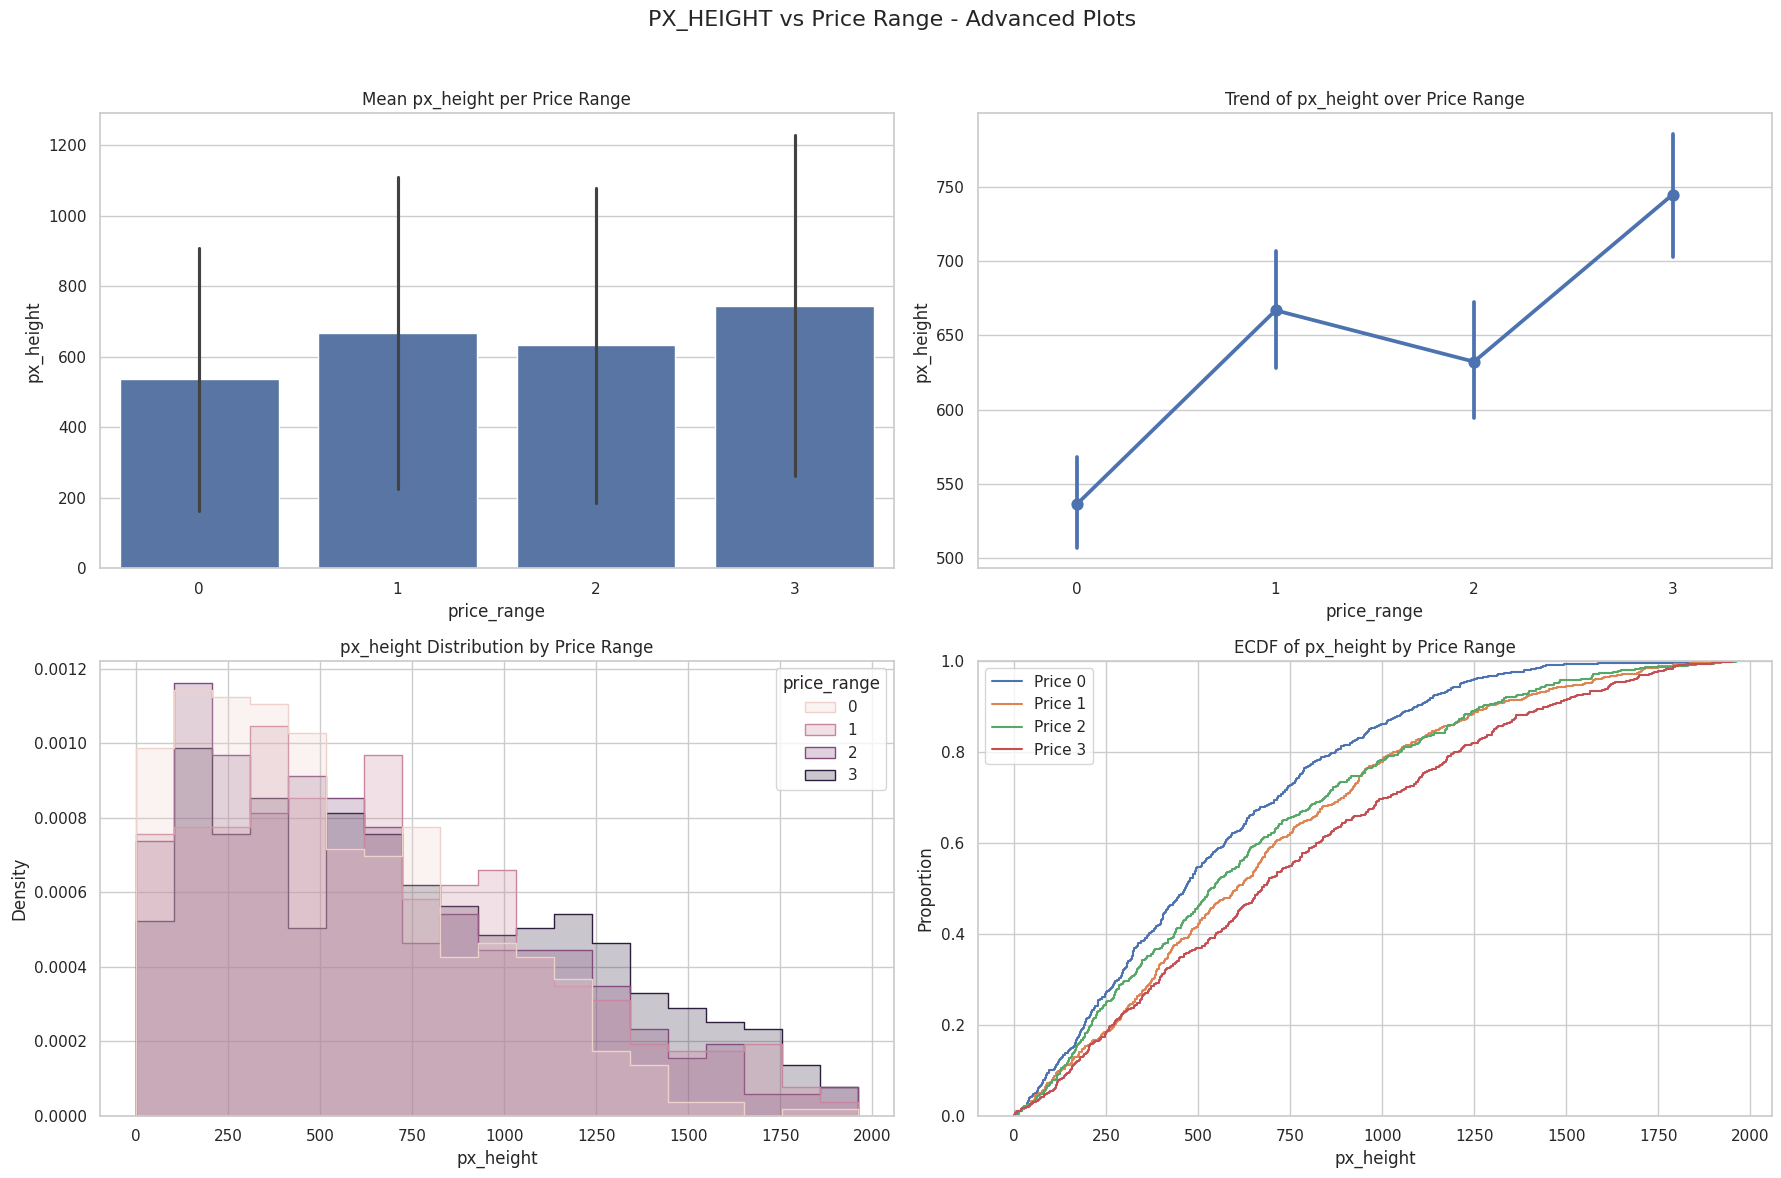

In [ ]:
# Define top correlated features with price_range
top_features = ['ram', 'battery_power', 'px_width', 'px_height']

# Set plot style
sns.set(style="whitegrid")

# Plot advanced visualizations for each top feature
for feature in top_features:
    plt.figure(figsize=(18, 12))
    plt.suptitle(f'{feature.upper()} vs Price Range - Advanced Plots', fontsize=16)

    # 1. Bar Plot of Mean
    plt.subplot(2, 2, 1)
    sns.barplot(x='price_range', y=feature, data=df, estimator='mean', ci='sd')
    plt.title(f'Mean {feature} per Price Range')

    # 2. Point Plot
    plt.subplot(2, 2, 2)
    sns.pointplot(x='price_range', y=feature, data=df)
    plt.title(f'Trend of {feature} over Price Range')

    # 3. Histogram Faceted by Price Range
    plt.subplot(2, 2, 3)
    sns.histplot(data=df, x=feature, hue='price_range', element='step', stat='density', common_norm=False)
    plt.title(f'{feature} Distribution by Price Range')

    # 4. ECDF Plot
    plt.subplot(2, 2, 4)
    for label in sorted(df['price_range'].unique()):
        subset = df[df['price_range'] == label]
        sns.ecdfplot(subset[feature], label=f'Price {label}')
    plt.title(f'ECDF of {feature} by Price Range')
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# Data Preprocessing for M.L Models

## Data is already Balanced

# Feature scaling (normalization)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('price_range', axis=1)
y = df['price_range']

# Apply standard scaling to features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Optional: combine back with target if needed
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# View result
print(df_scaled.head())


   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971  ...  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768  ...   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639  ...   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842  ...   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  ...   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0  0.391703 -0.784983  0.283103   1.

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_scaled.drop('price_range', axis=1)
y = df_scaled['price_range']

# Step 1: Split into train and temp (80% train+val, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 2: Split train+val into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Confirm sizes
print(f"Train size: {X_train.shape}")
print(f"Validation size: {X_val.shape}")
print(f"Test size: {X_test.shape}")


Train size: (1200, 20)
Validation size: (400, 20)
Test size: (400, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


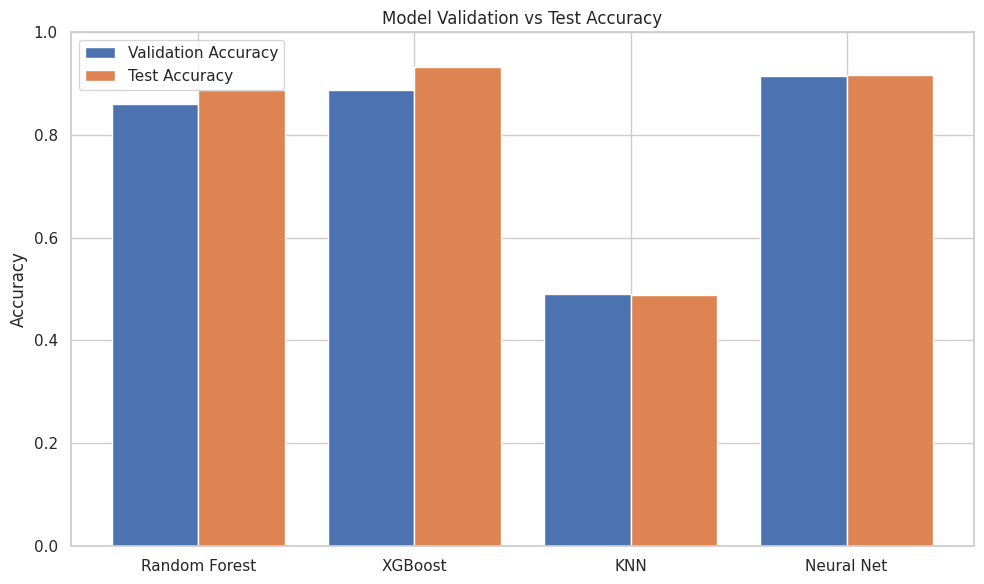

In [ ]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Neural Net': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
}

# Dictionaries to store accuracies
validation_accuracies = {}
testing_accuracies = {}

# Train, validate, and test each model
for name, model in models.items():
    model.fit(X_train, y_train)

    val_accuracy = accuracy_score(y_val, model.predict(X_val))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    validation_accuracies[name] = val_accuracy
    testing_accuracies[name] = test_accuracy

# Plotting the accuracies
labels = list(models.keys())
val_scores = [validation_accuracies[label] for label in labels]
test_scores = [testing_accuracies[label] for label in labels]

x = range(len(labels))
plt.figure(figsize=(10, 6))
plt.bar(x, val_scores, width=0.4, label='Validation Accuracy', align='center')
plt.bar([p + 0.4 for p in x], test_scores, width=0.4, label='Test Accuracy', align='center')
plt.xticks([p + 0.2 for p in x], labels)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Validation vs Test Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:41:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Score: 0.8975


In [ ]:
best_model = grid_search.best_estimator_

# Predict using the best model on new/unseen data
y_pred = best_model.predict(X_test)

# Map predictions to readable price categories
price_mapping = {
    0: 'Low',
    1: 'Medium',
    2: 'High',
    3: 'Very High'
}
price_predictions = [price_mapping[p] for p in y_pred]

# Print a few predictions
for i, prediction in enumerate(price_predictions[:10]):
    print(f"Sample {i+1}: Predicted Price Range = {prediction}")


Sample 1: Predicted Price Range = Very High
Sample 2: Predicted Price Range = Medium
Sample 3: Predicted Price Range = Low
Sample 4: Predicted Price Range = High
Sample 5: Predicted Price Range = Very High
Sample 6: Predicted Price Range = High
Sample 7: Predicted Price Range = Low
Sample 8: Predicted Price Range = Low
Sample 9: Predicted Price Range = Medium
Sample 10: Predicted Price Range = Low


<Figure size 800x600 with 0 Axes>

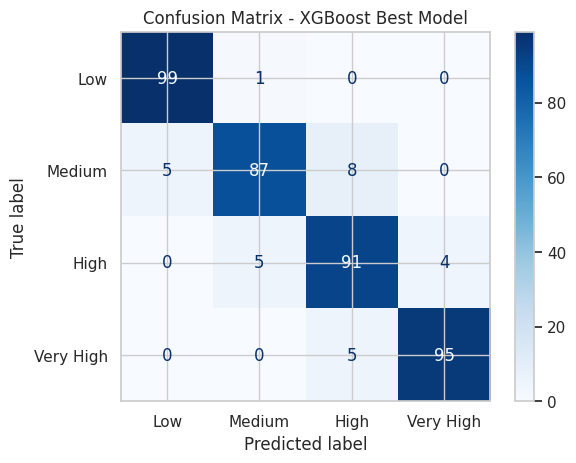

Classification Report:
              precision    recall  f1-score   support

         Low       0.95      0.99      0.97       100
      Medium       0.94      0.87      0.90       100
        High       0.88      0.91      0.89       100
   Very High       0.96      0.95      0.95       100

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Predict using the best model
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High', 'Very High'])

# Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - XGBoost Best Model")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High', 'Very High']))


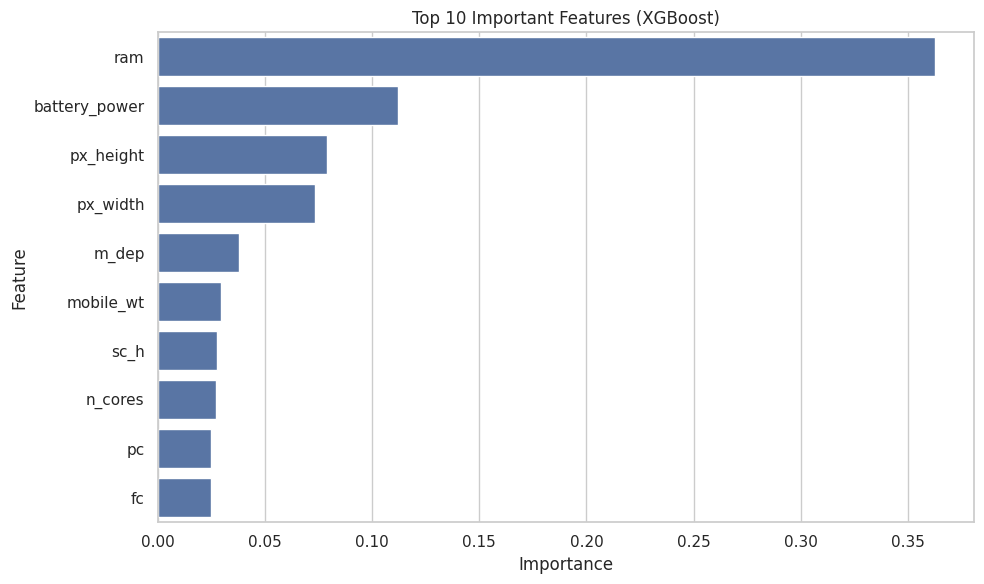

In [ ]:
# Get feature importances from the best XGBoost model
importances = best_model.feature_importances_

# Create a DataFrame for sorting and plotting
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top N features
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(top_n))
plt.title(f"Top {top_n} Important Features (XGBoost)")
plt.tight_layout()
plt.show()
